# NLP PIPELINE

There are mainly three stages of an NLP pipeline : Text Processing , Feature Extraction and Modeling
# 1 Text Processing

Text processing means taking raw input text,and clean,normalize it, and convert it into a form that is suitable for feature extraction.
## 1.1 Cleaning

Cleaning procedure aims to remove irrelevant items, such as HTML tags. And powerful tools of this procedure include regular expressions and beautiful soup

Beautiful soup is a python library used to extract data from HTML and XML documents. So we initialize a soup object by telling him the html file and the method to parse it.

In [7]:
from bs4 import BeautifulSoup
import requests

html = requests.get('https://medium.com/@haataa/nlp-pipeline-101-with-basic-code-example-cleaning-aeb23370a12').content  
soup = BeautifulSoup(html, 'html.parser', from_encoding='utf-8')
result = soup('div')

We can navigate, search, and modify a parse tree using beautiful soup. Most basic method are find_all(), select(),select_one(), prettify(), get_text(). Difference between find_all() and select() is that select() can search by tag layers.
Also **Re** is a python module provides regular expression matching operations. The very basic method are findall(),match(),search(),sub(),split()

In [8]:
soup.select("html head title")  

soup.select('td  div  a')  ##tag route td --> div --> a

soup.select('td > div > a')

soup.find_all("div", {"class":"course-summary-card"})

[]

## 1.2 Normalization

Normalization convert text to all lowercase and removing punctuation. The very basic method to achieve that are lower() and re.sub(). Below are examples.

In [9]:
text = '''Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & Javascript flavors of RegEx are supported.'''
text = text.lower()
print(text)

edit the expression & text to see matches. roll over matches or the expression for details. pcre & javascript flavors of regex are supported.


And remove punctuation can be done like this:

In [10]:
import re
text = re.sub(r"[^a-zA-Z0-9]", " ", text) 
print(text)

edit the expression   text to see matches  roll over matches or the expression for details  pcre   javascript flavors of regex are supported 


##  1.3 Tokenize

Tokenize means splitting text into words or tokens. And this is usually done by nltk word_tokenize. Below are example code.

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
text = '''Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & Javascript flavors of RegEx are supported.'''
words = word_tokenize(text)
print(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...


['Edit', 'the', 'Expression', '&', 'Text', 'to', 'see', 'matches', '.', 'Roll', 'over', 'matches', 'or', 'the', 'expression', 'for', 'details', '.', 'PCRE', '&', 'Javascript', 'flavors', 'of', 'RegEx', 'are', 'supported', '.']


[nltk_data]   Package punkt is already up-to-date!


And we can split text into sentences

In [13]:
sentences = sent_tokenize(text)
print(sentences)

['Edit the Expression & Text to see matches.', 'Roll over matches or the expression for details.', 'PCRE & Javascript flavors of RegEx are supported.']


# 1.4 Stop word removal

This procedure removing words that are too common(often been called as stopwords). And we will rely on nltk again but with a different method stopwords.

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
text = '''Edit the Expression & Text to see matches. Roll over matches or the expression for details. PCRE & Javascript flavors of RegEx are supported.'''
# Normalize text
text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
# Tokenize text
words = word_tokenize(text)
# Remove stop words
words = [w for w in words if w not in stopwords.words("english")]
print(words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...


['edit', 'expression', 'text', 'see', 'matches', 'roll', 'matches', 'expression', 'details', 'pcre', 'javascript', 'flavors', 'regex', 'supported']


[nltk_data]   Package stopwords is already up-to-date!


## 1.5 POS and NER

This procedure means identifying different parts of speech and named entities. Still we use nltk but this time pos_tag, ne_chunk

In [16]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('words')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
text = "I always lie down to tell a lie."
# tokenize text
sentence = word_tokenize(text)# tag each word with part of speech
pos_tag(sentence)

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!


[('I', 'PRP'),
 ('always', 'RB'),
 ('lie', 'VBP'),
 ('down', 'RP'),
 ('to', 'TO'),
 ('tell', 'VB'),
 ('a', 'DT'),
 ('lie', 'NN'),
 ('.', '.')]

We use ne_chunk to find named entities

In [17]:
text = "Jim will go to Beijing to study in Peking University"
# tokenize, pos tag, then recognize named entities in text
tree = ne_chunk(pos_tag(word_tokenize(text)))
print(tree)

(S
  (PERSON Jim/NNP)
  will/MD
  go/VB
  to/TO
  (GPE Beijing/NNP)
  to/TO
  study/VB
  in/IN
  (GPE Peking/NNP University/NNP))


##  1.6 Stemming and Lemmatization

This means converting words into their dictionary forms. And still nltk! This time it’s PorterStemmer and WordNetLemmatizer.

In [18]:
from nltk.stem.porter import PorterStemmer
words = ['renaissance', 'may', 'look', 'boring', 'look', 'least', 'twice']
# Reduce words to their stems
stemmed = [PorterStemmer().stem(w) for w in words]
print(stemmed)

['renaiss', 'may', 'look', 'bore', 'look', 'least', 'twice']


In [20]:
from nltk.stem.wordnet import WordNetLemmatizer
lemmed = [WordNetLemmatizer().lemmatize(w, pos='v') for w in words]
print(lemmed)

['renaissance', 'may', 'look', 'bore', 'look', 'least', 'twice']


# Feature Extraction

Feature extraction step means to extract and produce feature representations that are appropriate for the type of NLP task you are trying to accomplish and the type of model you are planning to use.
# Bag of Words

The bag-of-words model is a simplifying representation used in NLP. In this model, a text is represented as the bag of its words, disregarding grammar and even word order but keeping multiplicity.

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ["The first time you see The Second Renaissance it may look boring.",
        "Look at it at least twice and definitely watch part 2.",
        "It will change your view of the matrix.",
        "Are the human people the ones who started the war?",
        "Is AI a bad thing ?"]# initialize count vectorizer object
# use your own tokenize function
vect = CountVectorizer()
# get counts of each token (word) in text data
X = vect.fit_transform(corpus)
# convert sparse matrix to numpy array to view
X.toarray()
# view token vocabulary and counts
vect.vocabulary_

{'the': 24,
 'first': 8,
 'time': 26,
 'you': 33,
 'see': 22,
 'second': 21,
 'renaissance': 20,
 'it': 11,
 'may': 15,
 'look': 13,
 'boring': 5,
 'at': 3,
 'least': 12,
 'twice': 27,
 'and': 1,
 'definitely': 7,
 'watch': 30,
 'part': 18,
 'will': 32,
 'change': 6,
 'your': 34,
 'view': 28,
 'of': 16,
 'matrix': 14,
 'are': 2,
 'human': 9,
 'people': 19,
 'ones': 17,
 'who': 31,
 'started': 23,
 'war': 29,
 'is': 10,
 'ai': 0,
 'bad': 4,
 'thing': 25}

# TF-IDF

TF-IDF is short for term frequency–inverse document frequency. It’s designed to reflect how important a word is to a document in a collection or corpus.

The TF-IDF value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.
And similar to bag of words, sklearn.feature_extraction.text provide method. Below are sample codes.

In [25]:
from sklearn.feature_extraction.text import TfidfTransformer# initialize tf-idf transformer object
transformer = TfidfTransformer(smooth_idf=False)# use counts from count vectorizer results to compute tf-idf values
tfidf = transformer.fit_transform(X)# convert sparse matrix to numpy array to view
tfidf.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.31287579, 0.        , 0.        , 0.31287579, 0.        ,
        0.        , 0.18115041, 0.        , 0.22976633, 0.        ,
        0.31287579, 0.        , 0.        , 0.        , 0.        ,
        0.31287579, 0.31287579, 0.31287579, 0.        , 0.36230083,
        0.        , 0.31287579, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.31287579, 0.        ],
       [0.        , 0.30324588, 0.        , 0.60649177, 0.        ,
        0.        , 0.        , 0.30324588, 0.        , 0.        ,
        0.        , 0.17557484, 0.30324588, 0.22269443, 0.        ,
        0.        , 0.        , 0.        , 0.30324588, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.30324588, 0.        , 0.        ,
        0.30324588, 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.

# word2vec

Word2vec is a group of related models that are used to produce word embeddings. Word2vec takes as its input a large corpus of text and produces a vector space, typically of several hundred dimensions, with each unique word in the corpus being assigned a corresponding vector in the space.

Word vectors are positioned in the vector space such that words that share common contexts in the corpus are located in close proximity to one another in the space.

There are typically two models: CBOW and Skip-grams.

After we get the word vectors, we can use it to extract features from a given document. One simple technique that seems to work reasonably well for short texts (e.g., a sentence or a tweet) is to compute the vector for each word in the document, and then aggregate them using the coordinate-wise mean, min, or max.

# Glove

Like word2vec, Glove is another commonly used word embedding method. Glove is short for global matrix factorization ,it is the process of using matrix factorization methods from linear algebra to perform rank reduction on a large term-frequency matrix.

And this is what feature extraction part of the NLP pipeline do. In the next article, I will go through the model part.

# Modeling

The final stage of the NLP pipeline is modeling, which includes :

**Model**:designing a statistical or machine learning model;

**Train**: fitting its parameters to training data, using an optimization procedure;

**Predict**: then using it to make predictions about unseen data.

Below are a code example:

In [ ]:
def main():    # load data
    X, y = load_data()
    # train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y)    # feature extraction
    vect = CountVectorizer(tokenizer=tokenize)
    tfidf = TfidfTransformer()
    # choose model
    clf = RandomForestClassifier()

    # train classifier
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    clf.fit(X_train_tfidf, y_train)

    # predict on test data
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)
    y_pred = clf.predict(X_test_tfidf)

    # display results
    display_results(y_test, y_pred)

# Pipeline

We can use scikit-learn’s Pipeline to simplify the above code. A pipeline is defined as Sequentially apply a list of transforms and a final estimator. Intermediate steps of pipeline must implement fit and transform methods and the final estimator only needs to implement fit.

Now let’s pause for a moment and learn what’s estimator, transformer and predictor.

    ESTIMATOR: An estimator is any object that learns from data, whether it’s a classification, regression, or clustering algorithm, or a transformer that extracts or filters useful features from raw data. Since estimators learn from data, they each must have a fit method that takes a dataset.

    TRANSFORMER: A transformer is a specific type of estimator that has a fit method to learn from training data, and then a transform method to apply a transformation model to new data. These transformations can include cleaning, reducing, expanding, or generating features.

    PREDICTOR: A predictor is a specific type of estimator that has a predict method to predict on test data based on a supervised learning algorithm, and has a fit method to train the model on training data.
    
 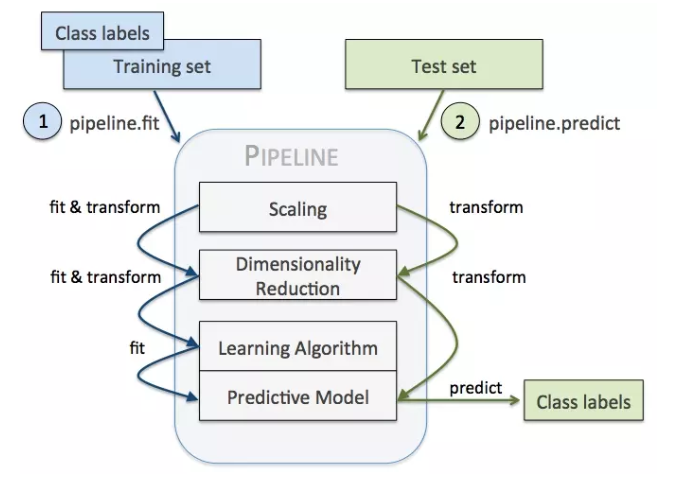

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])

# train classifier
pipeline.fit(Xtrain)

# evaluate all steps on test set
predicted = pipeline.predict(Xtest)

# Why pipeline?
1. Simplicity and Convenience

Chaining all of your steps into one estimator allows you to fit and predict on all steps of your sequence automatically with one call. It handles smaller steps for you, so you can focus on implementing higher level changes swiftly and efficiently.
2. Optimizing Entire Workflow

By running grid search on your pipeline, you’re able to optimize your entire workflow, including data transformation and modeling steps. This accounts for any interactions among the steps that may affect the final metrics. Below are a code example.

In [ ]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

parameters = {
    'scaler__with_mean': [True, False]
    'clf__kernel': ['linear', 'rbf'],
    'clf__C':[1, 10]
}

cv = GridSearchCV(pipeline, param_grid=parameters)

cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# 3. Preventing Data leakage

Using Pipeline, all transformations for data preparation and feature extractions occur within each fold of the cross validation process. This prevents common mistakes where you’d allow your training process to be influenced by your test data.

# Feature Union

Feature union is a class in scikit-learn’s Pipeline module that allows us to perform steps in parallel and take the union of their results for the next step. A pipeline performs a list of steps in a linear sequence, while a feature union performs a list of steps in parallel and then combines their results.

Like pipelines, feature unions are built using a list of (key, value) pairs, where the key is the string that you want to name a step, and the value is the estimator object.

In [ ]:
X = df['text'].values
y = df['label'].values
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([
    ('features', FeatureUnion([

        ('nlp_pipeline', Pipeline([
            ('vect', CountVectorizer()
            ('tfidf', TfidfTransformer())
        ])),

        ('txt_len', TextLengthExtractor())
    ])),

    ('clf', RandomForestClassifier())
])

# train classifier
pipeline.fit(Xtrain)

# predict on test data
predicted = pipeline.predict(Xtest)

# Creating Custom Transformer

With the help of pipeline and feature union, we can greatly simplify our code. But what if we need some transformer that sklearn don’t have? Fortunately we can create our own customized transformers.

All we need to do is write a class and change it’s fit and transform method.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class CaseNormalizer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.Series(X).apply(lambda x: x.lower()).values

case_normalizer = CaseNormalizer()

X = np.array(['Implementing', 'a', 'Custom', 'Transformer', 'from', 'SCIKIT-LEARN'])
case_normalizer.transform(X)